**Necessary Libraries**

In [107]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

**Importing Dataset**

In [108]:
df = pd.read_csv('/content/Ford Car Price Prediction.csv')
df.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,Fiesta,2017,12000,Automatic,15944,Petrol,NaN,57.7,1.0
1,Focus,2018,14000,Manual,9083,Petrol,NaN,57.7,1.0
2,Focus,2017,13000,Manual,12456,Petrol,NaN,57.7,1.0
3,Fiesta,2019,17500,Manual,10460,Petrol,NaN,40.3,1.5
4,Fiesta,2019,16500,Automatic,1482,Petrol,NaN,48.7,1.0


In [109]:
print(type(df))

<class 'pandas.core.frame.DataFrame'>


In [86]:
print("Keys of Ford Car Price Prediction Dataset: \n", df.keys())

Keys of Ford Car Price Prediction Dataset: 
 Index(['model', 'year', 'price', 'transmission', 'mileage', 'fuelType', 'tax',
       'mpg', 'engineSize'],
      dtype='object')


In [110]:
df

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,Fiesta,2017,12000,Automatic,15944,Petrol,NaN,57.7,1.0
1,Focus,2018,14000,Manual,9083,Petrol,NaN,57.7,1.0
2,Focus,2017,13000,Manual,12456,Petrol,NaN,57.7,1.0
3,Fiesta,2019,17500,Manual,10460,Petrol,NaN,40.3,1.5
4,Fiesta,2019,16500,Automatic,1482,Petrol,NaN,48.7,1.0
...,...,...,...,...,...,...,...,...,...
17961,B-MAX,2017,8999,Manual,16700,Petrol,150.0,47.1,1.4
17962,B-MAX,2014,7499,Manual,40700,Petrol,30.0,57.7,1.0
17963,Focus,2015,9999,Manual,7010,Diesel,20.0,67.3,1.6
17964,KA,2018,8299,Manual,5007,Petrol,145.0,57.7,1.2


In [111]:
df.shape

(17966, 9)

In [112]:
print(df.info)

<bound method DataFrame.info of          model  year  price transmission  mileage fuelType    tax   mpg  \
0       Fiesta  2017  12000    Automatic    15944   Petrol    NaN  57.7   
1        Focus  2018  14000       Manual     9083   Petrol    NaN  57.7   
2        Focus  2017  13000       Manual    12456   Petrol    NaN  57.7   
3       Fiesta  2019  17500       Manual    10460   Petrol    NaN  40.3   
4       Fiesta  2019  16500    Automatic     1482   Petrol    NaN  48.7   
...        ...   ...    ...          ...      ...      ...    ...   ...   
17961    B-MAX  2017   8999       Manual    16700   Petrol  150.0  47.1   
17962    B-MAX  2014   7499       Manual    40700   Petrol   30.0  57.7   
17963    Focus  2015   9999       Manual     7010   Diesel   20.0  67.3   
17964       KA  2018   8299       Manual     5007   Petrol  145.0  57.7   
17965    Focus  2015   8299       Manual     5007   Petrol   22.0  57.7   

       engineSize  
0             1.0  
1             1.0  
2      

**Number of Null Values in features**

In [113]:
df.isnull().sum()

,0
model,0
year,0
price,0
transmission,0
mileage,0
fuelType,0
tax,9
mpg,0
engineSize,0


Checking number of values are missing in the tax column

In [114]:
print("Number of rows with null values in category_desc column: ", df['tax'].isnull().sum())

Number of rows with null values in category_desc column:  9


In [115]:
ford_car_price = df[df['tax'].notnull()]
print("Shape after removing null values: ", ford_car_price.shape)

Shape after removing null values:  (17957, 9)


Wanted to fill the missing values with mean() but
incase of tax it depends on other feautures, to keep authenticity of the dataset
So,

*   Droping Rows With any Missing Values



In [116]:
df = df.dropna()

In [117]:
df.shape

(17957, 9)

Checking if there is any number of duplicate rows

In [118]:
num_duplicates = df.duplicated().sum()
print(f'Number of duplicate rows: {num_duplicates}')

Number of duplicate rows: 154


Displaying the Number of Duplicate Rows

In [119]:
duplicates = df[df.duplicated()]
print(duplicates)

                        model  year  price transmission  mileage fuelType  \
159                     Focus  2016  10995       Manual    30923   Diesel   
312                     Focus  2019  14998       Manual     7000   Petrol   
349                     Focus  2019  14998       Manual     7000   Petrol   
510                  EcoSport  2019  15489       Manual     5636   Diesel   
512     Grand Tourneo Connect  2019  19999       Manual     3500   Diesel   
...                       ...   ...    ...          ...      ...      ...   
14556                  Mondeo  2015   6793       Manual   138000   Diesel   
15121                    Kuga  2017  14999       Manual    24877   Diesel   
15127                EcoSport  2019  16799    Automatic      433   Petrol   
15685                      KA  2008   1795       Manual    63000   Petrol   
17608                   B-MAX  2017  11495    Automatic     5000   Petrol   

         tax   mpg  engineSize  
159      0.0  74.3         1.5  
312    14

To keep Dataset Variations Clean Removing the Duplicate Values

In [120]:
df = df.drop_duplicates()

In [121]:
#checking
num_duplicates = df.duplicated().sum()
print(f'Number of duplicate rows: {num_duplicates}')

Number of duplicate rows: 0


**Encode categorical variables**

Identifying the Categorical Columns

In [122]:
print(df.dtypes)
categorical_cols = df.select_dtypes(include=['object']).columns
print(f'Categorical columns: {categorical_cols}')

model            object
year              int64
price             int64
transmission     object
mileage           int64
fuelType         object
tax             float64
mpg             float64
engineSize      float64
dtype: object
Categorical columns: Index(['model', 'transmission', 'fuelType'], dtype='object')


Exploring Variations in Categorical Columns

In [123]:
for col in ['model', 'transmission', 'fuelType']:
    print(f'\nUnique values in {col}:')
    print(df[col].value_counts())


Unique values in model:
model
 Fiesta                   6504
 Focus                    4553
 Kuga                     2207
 EcoSport                 1127
 C-MAX                     542
 Ka+                       523
 Mondeo                    512
 B-MAX                     350
 S-MAX                     294
 Grand C-MAX               247
 Galaxy                    227
 Edge                      205
 KA                        197
 Puma                       78
 Tourneo Custom             69
 Mustang                    57
 Grand Tourneo Connect      57
 Tourneo Connect            32
 Fusion                     16
 Streetka                    2
 Ranger                      1
 Escort                      1
 Transit Tourneo             1
Focus                        1
Name: count, dtype: int64

Unique values in transmission:
transmission
Manual       15377
Automatic     1351
Semi-Auto     1075
Name: count, dtype: int64

Unique values in fuelType:
fuelType
Petrol      12073
Diesel       570

In [124]:
df.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
9,Focus,2018,10000,Manual,48141,Petrol,145.0,61.4,1.0
10,Fiesta,2018,11561,Manual,18803,Petrol,145.0,56.5,1.0
11,EcoSport,2018,13500,Manual,12065,Petrol,145.0,54.3,1.0
12,Fiesta,2017,11000,Manual,20978,Petrol,0.0,65.7,1.0
13,Kuga,2018,17999,Semi-Auto,9002,Diesel,145.0,54.3,2.0


Used **Label Encoder** to convert categorical values (car models) into numerical values, enabling machine learning algorithms to process and analyze the data efficientl

In [125]:

label_encoder = LabelEncoder()

df['model_encoded'] = label_encoder.fit_transform(df['model'])

# Check the transformed column
print(df[['model', 'model_encoded']].head())

        model  model_encoded
9       Focus              6
10     Fiesta              5
11   EcoSport              2
12     Fiesta              5
13       Kuga             13


In [126]:
model_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))


for model, encoded_value in model_mapping.items():
    print(f'{model}: {encoded_value}')

 B-MAX: 0
 C-MAX: 1
 EcoSport: 2
 Edge: 3
 Escort: 4
 Fiesta: 5
 Focus: 6
 Fusion: 7
 Galaxy: 8
 Grand C-MAX: 9
 Grand Tourneo Connect: 10
 KA: 11
 Ka+: 12
 Kuga: 13
 Mondeo: 14
 Mustang: 15
 Puma: 16
 Ranger: 17
 S-MAX: 18
 Streetka: 19
 Tourneo Connect: 20
 Tourneo Custom: 21
 Transit Tourneo: 22
Focus: 23


For Transmission **On-Hot** Encoding As Number of Variation is Small

In [127]:
# Apply One-Hot Encoding to the 'transmission' column
df = pd.get_dummies(df, columns=['transmission'], drop_first=False)

Same For Transmission there is no ordinal relationship between the fuel types

In [131]:
df = pd.get_dummies(df, columns=['fuelType'], drop_first=False)

In [132]:
(df.head())
# print(df.dtypes)

,model,year,price,mileage,tax,mpg,engineSize,model_encoded,transmission_Automatic,transmission_Manual,transmission_Semi-Auto,fuelType_Diesel,fuelType_Electric,fuelType_Hybrid,fuelType_Other,fuelType_Petrol
9,Focus,2018,10000,48141,145.0,61.4,1.0,6,False,True,False,False,False,False,False,True
10,Fiesta,2018,11561,18803,145.0,56.5,1.0,5,False,True,False,False,False,False,False,True
11,EcoSport,2018,13500,12065,145.0,54.3,1.0,2,False,True,False,False,False,False,False,True
12,Fiesta,2017,11000,20978,0.0,65.7,1.0,5,False,True,False,False,False,False,False,True
13,Kuga,2018,17999,9002,145.0,54.3,2.0,13,False,False,True,True,False,False,False,False


In [133]:
bool_columns = ['transmission_Automatic', 'transmission_Manual', 'transmission_Semi-Auto',
                'fuelType_Diesel', 'fuelType_Electric', 'fuelType_Hybrid',
                'fuelType_Other', 'fuelType_Petrol']

df[bool_columns] = df[bool_columns].astype(int)

# Display the updated DataFrame
df.head()

,model,year,price,mileage,tax,mpg,engineSize,model_encoded,transmission_Automatic,transmission_Manual,transmission_Semi-Auto,fuelType_Diesel,fuelType_Electric,fuelType_Hybrid,fuelType_Other,fuelType_Petrol
9,Focus,2018,10000,48141,145.0,61.4,1.0,6,0,1,0,0,0,0,0,1
10,Fiesta,2018,11561,18803,145.0,56.5,1.0,5,0,1,0,0,0,0,0,1
11,EcoSport,2018,13500,12065,145.0,54.3,1.0,2,0,1,0,0,0,0,0,1
12,Fiesta,2017,11000,20978,0.0,65.7,1.0,5,0,1,0,0,0,0,0,1
13,Kuga,2018,17999,9002,145.0,54.3,2.0,13,0,0,1,1,0,0,0,0


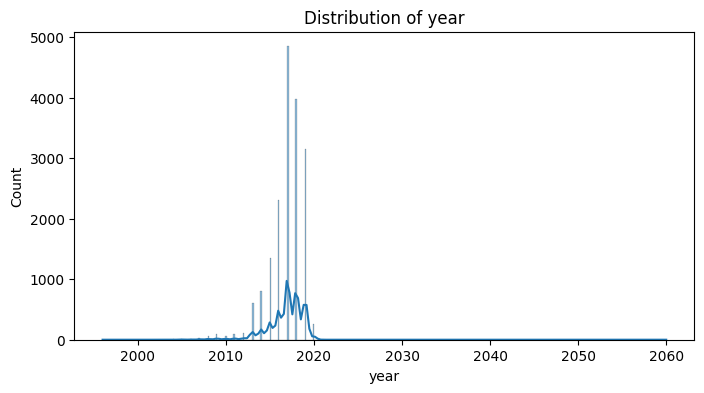

Summary Statistics for year:
count    17803.000000
mean      2016.861933
std          2.052242
min       1996.000000
25%       2016.000000
50%       2017.000000
75%       2018.000000
max       2060.000000
Name: year, dtype: float64 



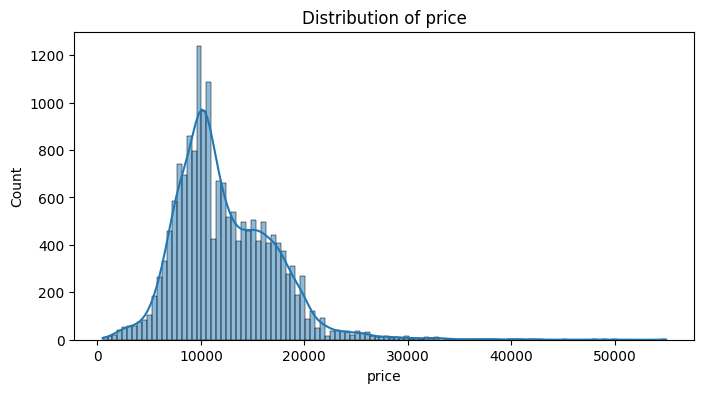

Summary Statistics for price:
count    17803.000000
mean     12267.867045
std       4735.451913
min        495.000000
25%       8999.000000
50%      11280.000000
75%      15295.000000
max      54995.000000
Name: price, dtype: float64 



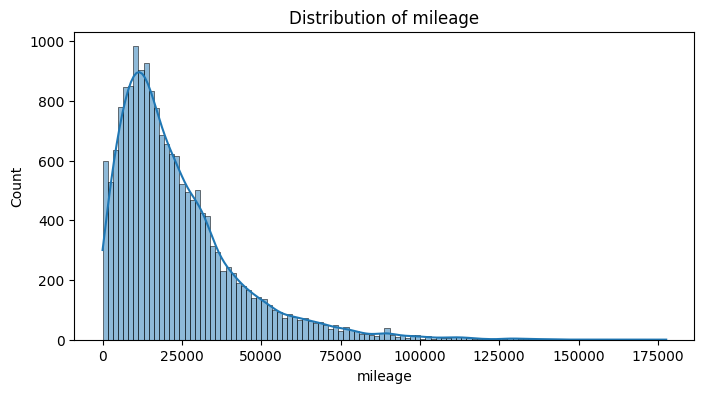

Summary Statistics for mileage:
count     17803.000000
mean      23386.965399
std       19421.018522
min           1.000000
25%       10000.000000
50%       18291.000000
75%       31100.000000
max      177644.000000
Name: mileage, dtype: float64 



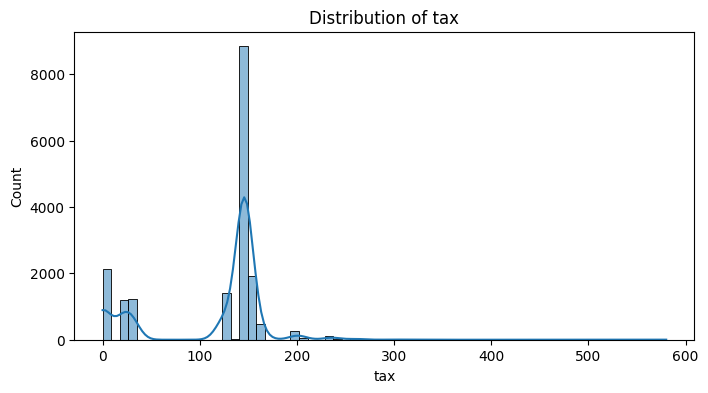

Summary Statistics for tax:
count    17803.000000
mean       113.298152
std         62.045725
min          0.000000
25%         30.000000
50%        145.000000
75%        145.000000
max        580.000000
Name: tax, dtype: float64 



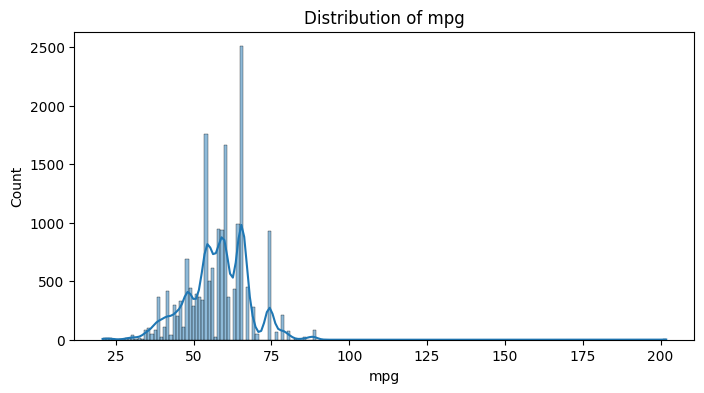

Summary Statistics for mpg:
count    17803.000000
mean        57.912307
std         10.133008
min         20.800000
25%         52.300000
50%         58.900000
75%         65.700000
max        201.800000
Name: mpg, dtype: float64 



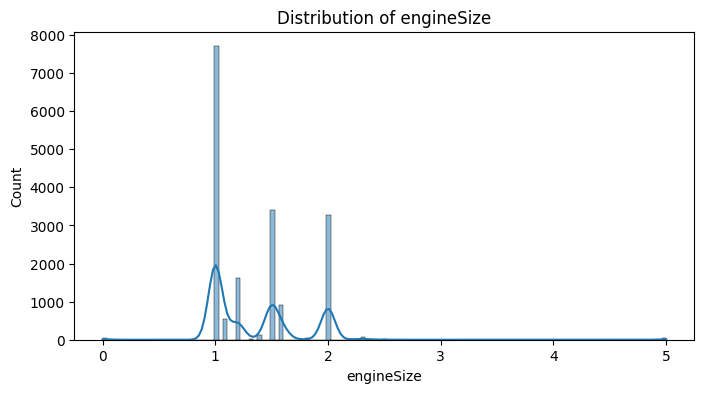

Summary Statistics for engineSize:
count    17803.000000
mean         1.350671
std          0.432616
min          0.000000
25%          1.000000
50%          1.200000
75%          1.500000
max          5.000000
Name: engineSize, dtype: float64 



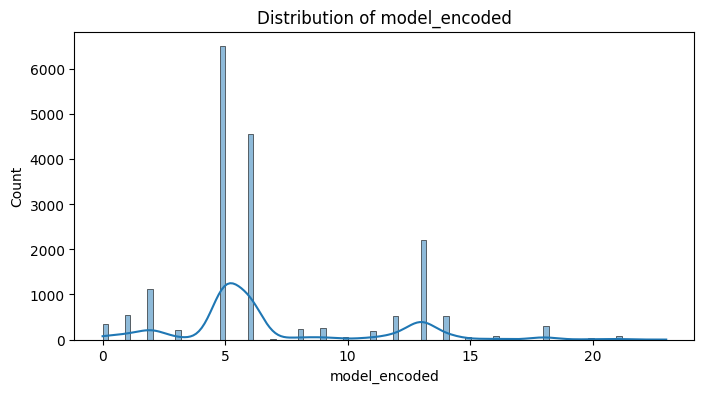

Summary Statistics for model_encoded:
count    17803.000000
mean         6.844914
std          4.008913
min          0.000000
25%          5.000000
50%          6.000000
75%          8.000000
max         23.000000
Name: model_encoded, dtype: float64 



In [75]:

def check_distribution(df, columns):
    for col in columns:
        plt.figure(figsize=(8, 4))
        sns.histplot(df[col].dropna(), kde=True)
        plt.title(f'Distribution of {col}')
        plt.show()
        print(f'Summary Statistics for {col}:')
        print(df[col].describe(), '\n')


numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns
check_distribution(df, numerical_columns)

**Feature Scaling**

In [134]:
df2 = df.copy()

In [135]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score



# Step 2: Drop the 'model' column and prepare features and target variable
X = df2.drop(['price', 'model'], axis=1)  # Dropping 'price' and 'model' columns
y = df2['price']

# Step 3: Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 4: Define different scalers
scalers = {
    'MinMaxScaler': MinMaxScaler(),
    'StandardScaler': StandardScaler(),
    'RobustScaler': RobustScaler()
}

# Step 5: Compare performance of each scaler
results = {}

for scaler_name, scaler in scalers.items():
    # Scale the data
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Train the model
    model = KNeighborsClassifier()  # Replace with your preferred model
    model.fit(X_train_scaled, y_train)

    # Predict and evaluate the model
    y_pred = model.predict(X_test_scaled)
    accuracy = accuracy_score(y_test, y_pred)

    # Store the results
    results[scaler_name] = accuracy

# Step 6: Print the results
for scaler_name, accuracy in results.items():
    print(f'{scaler_name} Test Accuracy: {accuracy:.4f}')


MinMaxScaler Test Accuracy: 0.0124
StandardScaler Test Accuracy: 0.0152
RobustScaler Test Accuracy: 0.0146


**It appears that none of the scalers significantly improved model's performance.**

In [149]:
d1=df2.drop(['model'], axis=1)

In [150]:
correlation_matrix = d1.corr()

<Axes: >

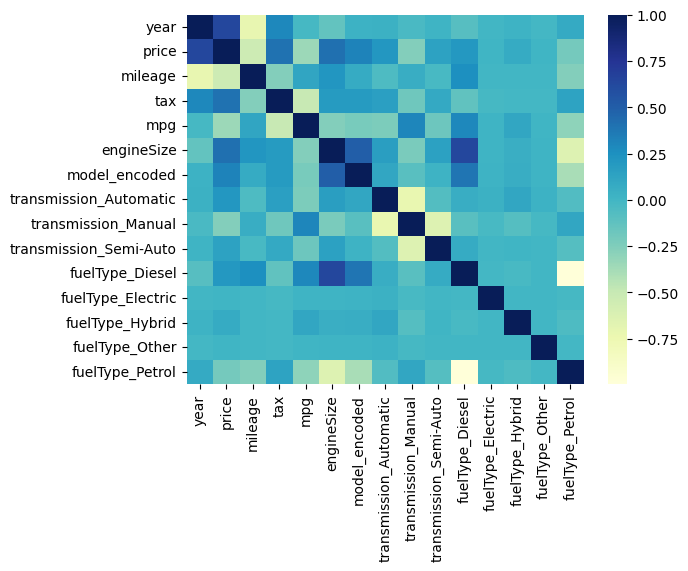

In [152]:
import seaborn as sns

sns.heatmap(correlation_matrix, cmap = 'YlGnBu')

In [153]:
# Extract correlations with the target column 'price'
price_correlation = correlation_matrix['price'].drop('price')

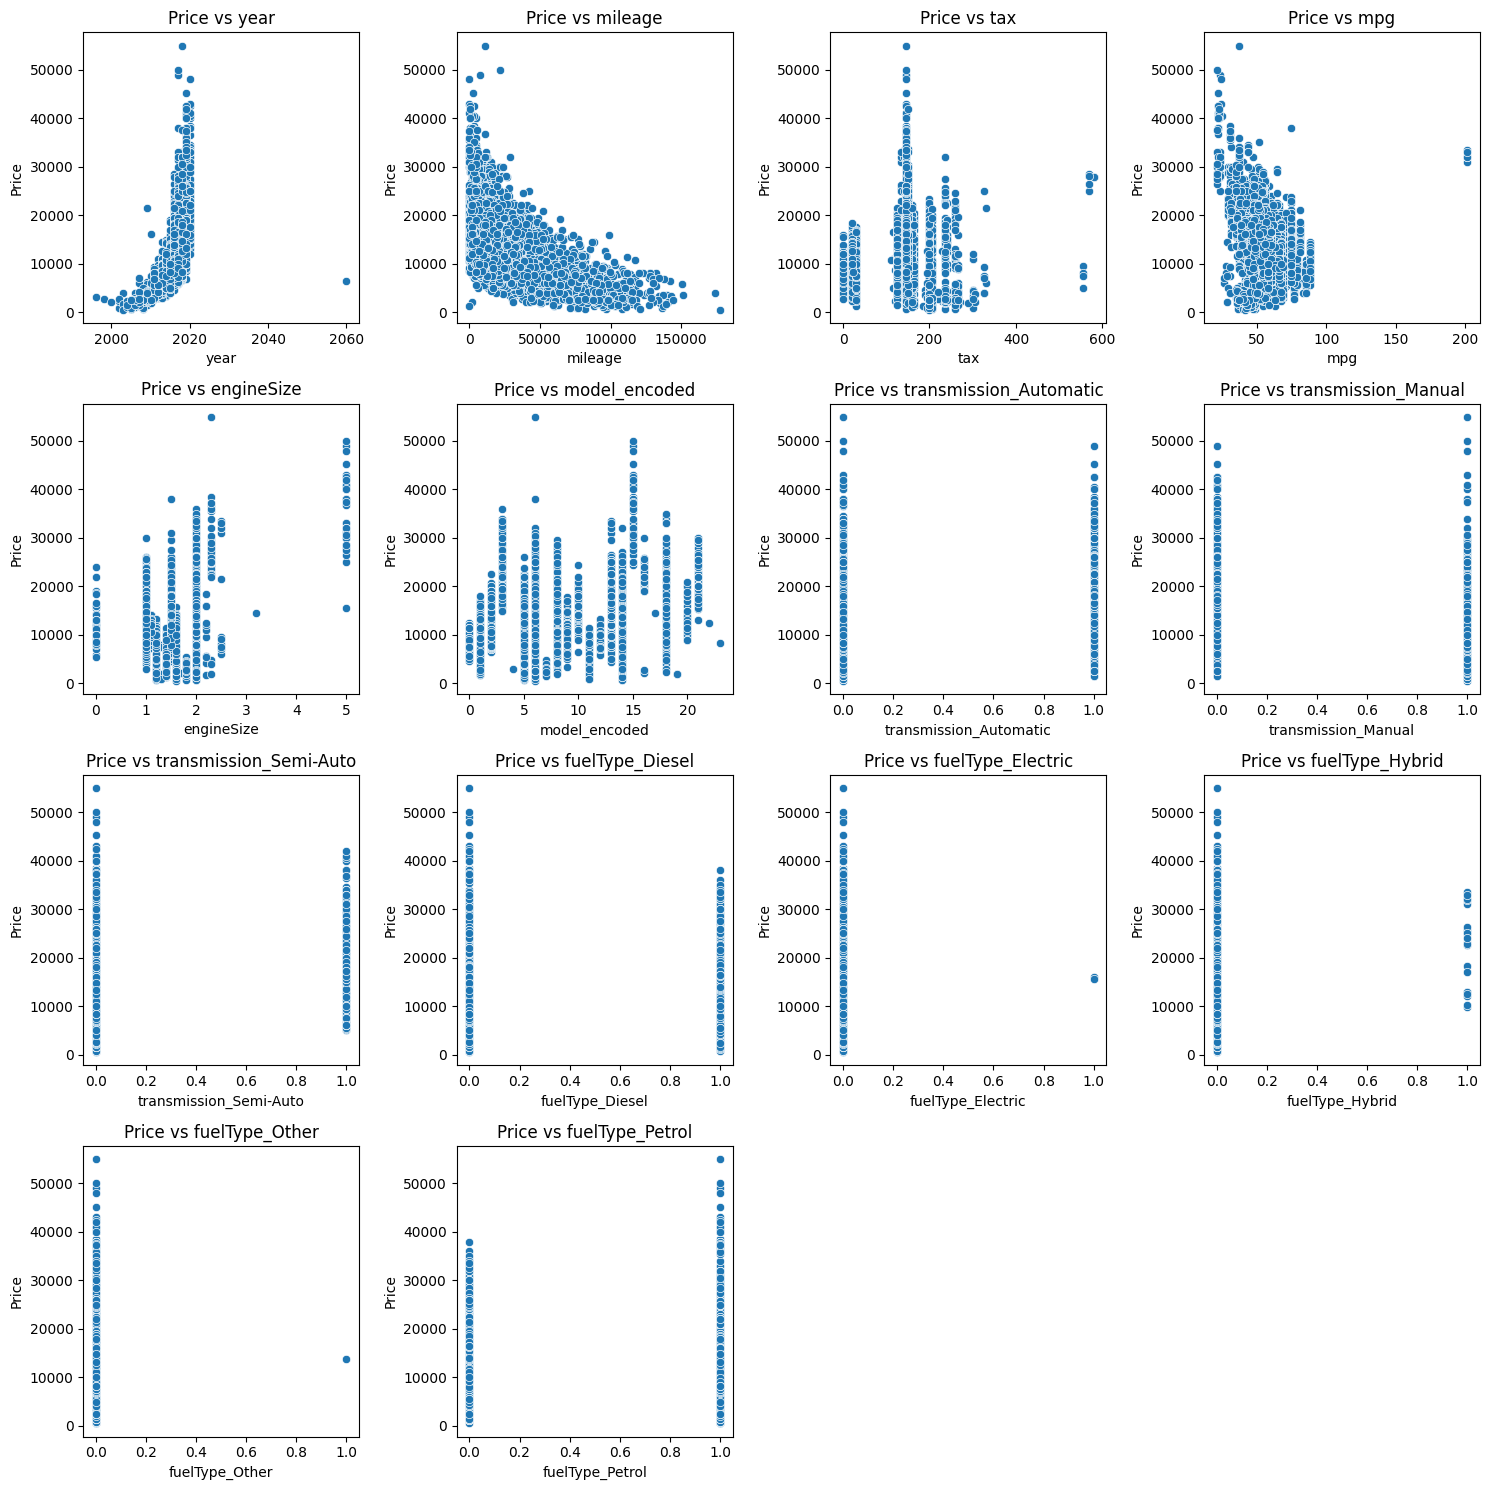

In [154]:
# List of features to plot
features = ['year', 'mileage', 'tax', 'mpg', 'engineSize', 'model_encoded',
             'transmission_Automatic', 'transmission_Manual', 'transmission_Semi-Auto',
             'fuelType_Diesel', 'fuelType_Electric', 'fuelType_Hybrid', 'fuelType_Other', 'fuelType_Petrol']

# Set up the matplotlib figure
plt.figure(figsize=(15, 15))

# Plot scatter plots for each feature vs. price
for i, feature in enumerate(features, 1):
    plt.subplot(4, 4, i)  # Adjust the grid size as needed
    sns.scatterplot(data=data, x=feature, y='price')
    plt.title(f'Price vs {feature}')
    plt.xlabel(feature)
    plt.ylabel('Price')

plt.tight_layout()
plt.show()

In [156]:
price_correlation = correlation_matrix['price'].drop('price')

# Compute absolute correlation values
abs_price_correlation = abs(price_correlation)

# Sort features by absolute correlation values (ascending order)
sorted_features = abs_price_correlation.sort_values().index.tolist()

# Print sorted features with their correlation values
for feature in sorted_features:
    print(f"Feature: {feature}, Correlation with price: {price_correlation[feature]:.4f}")

Feature: fuelType_Other, Correlation with price: 0.0024
Feature: fuelType_Electric, Correlation with price: 0.0078
Feature: fuelType_Hybrid, Correlation with price: 0.0734
Feature: transmission_Semi-Auto, Correlation with price: 0.1408
Feature: fuelType_Diesel, Correlation with price: 0.1991
Feature: fuelType_Petrol, Correlation with price: -0.2046
Feature: transmission_Automatic, Correlation with price: 0.2076
Feature: transmission_Manual, Correlation with price: -0.2580
Feature: model_encoded, Correlation with price: 0.3158
Feature: mpg, Correlation with price: -0.3460
Feature: tax, Correlation with price: 0.4060
Feature: engineSize, Correlation with price: 0.4116
Feature: mileage, Correlation with price: -0.5304
Feature: year, Correlation with price: 0.6357


**As it is been told to drop 1-2 features so I dropped 2 Otherwise would have dropped more**

In [157]:

df_reduced = df.drop(columns=['fuelType_Other', 'fuelType_Electric'])

print("Shape of the DataFrame after dropping features:", df_reduced.shape)


Shape of the DataFrame after dropping features: (17803, 14)


In [158]:
final_dataset = df.copy()
final_dataset.head()

,model,year,price,mileage,tax,mpg,engineSize,model_encoded,transmission_Automatic,transmission_Manual,transmission_Semi-Auto,fuelType_Diesel,fuelType_Electric,fuelType_Hybrid,fuelType_Other,fuelType_Petrol
9,Focus,2018,10000,48141,145.0,61.4,1.0,6,0,1,0,0,0,0,0,1
10,Fiesta,2018,11561,18803,145.0,56.5,1.0,5,0,1,0,0,0,0,0,1
11,EcoSport,2018,13500,12065,145.0,54.3,1.0,2,0,1,0,0,0,0,0,1
12,Fiesta,2017,11000,20978,0.0,65.7,1.0,5,0,1,0,0,0,0,0,1
13,Kuga,2018,17999,9002,145.0,54.3,2.0,13,0,0,1,1,0,0,0,0
